In [9]:
import geopandas as gpd
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from adjustText import adjust_text
from scipy.stats import kendalltau, pearsonr

In [19]:
year = 2019
month = 11
location_level = "province_id"

In [12]:
# provinces communities
gdf = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson")
# gdf["state_id"] = gdf["cod_ccaa"].astype(int)
gdf["province_id"] = gdf["cod_prov"].astype(int)
gdf

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry,province_id
0,07,Illes Balears,03,7,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((3.21365 39.95751, 3.15440 39.9...",7
1,33,Asturias,18,33,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43...",33
2,15,A Coruña,11,15,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-7.68030 43.78714, -7.66231 43...",15
3,17,Girona,08,17,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((1.74871 42.49482, 1.82355 42.4...",17
4,35,Las Palmas,04,35,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-13.89051 28.75685, -13.83632 ...",35
5,36,Pontevedra,11,36,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-8.18101 42.85828, -8.11637 42...",36
6,38,Santa Cruz De Tenerife,04,38,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-16.15754 28.58816, -16.12669 ...",38
7,39,Cantabria,05,39,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-3.59024 43.51356, -3.54634 43...",39
8,29,Málaga,01,29,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-4.40658 37.27412, -4.37894 37...",29
9,04,Almería,01,4,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-2.18191 37.89882, -2.17201 37...",4


In [46]:
for index, row in gdf.iterrows():
    print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))

C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Loc

0 0       POINT (2.90529 39.57184)
1      POINT (-5.99227 43.29180)
2      POINT (-8.46327 43.12676)
3       POINT (2.67400 42.12813)
4     POINT (-14.55288 28.36158)
5      POINT (-8.46173 42.43562)
6     POINT (-17.02501 28.31401)
7      POINT (-4.03050 43.19697)
8      POINT (-4.72512 36.81374)
9      POINT (-2.34586 37.19450)
10     POINT (-1.48397 38.00122)
11     POINT (-1.97981 38.82560)
12     POINT (-4.94573 40.57087)
13     POINT (-2.71784 42.83435)
14     POINT (-6.14203 38.70900)
15     POINT (-0.56792 38.47730)
16     POINT (-7.59152 42.19673)
17      POINT (1.98421 41.73063)
18     POINT (-3.58603 42.36924)
19     POINT (-6.16021 39.71140)
20     POINT (-5.76061 36.55270)
21     POINT (-0.14629 40.24034)
22     POINT (-3.82870 38.92524)
23     POINT (-3.44241 38.01701)
24     POINT (-4.80884 37.99215)
25     POINT (-2.19663 39.89662)
26     POINT (-3.26664 37.31423)
27     POINT (-2.62268 40.81370)
28     POINT (-2.19281 43.14482)
29     POINT (-6.82852 37.57620)
30     P

C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Loc

12 0       POINT (2.90529 39.57184)
1      POINT (-5.99227 43.29180)
2      POINT (-8.46327 43.12676)
3       POINT (2.67400 42.12813)
4     POINT (-14.55288 28.36158)
5      POINT (-8.46173 42.43562)
6     POINT (-17.02501 28.31401)
7      POINT (-4.03050 43.19697)
8      POINT (-4.72512 36.81374)
9      POINT (-2.34586 37.19450)
10     POINT (-1.48397 38.00122)
11     POINT (-1.97981 38.82560)
12     POINT (-4.94573 40.57087)
13     POINT (-2.71784 42.83435)
14     POINT (-6.14203 38.70900)
15     POINT (-0.56792 38.47730)
16     POINT (-7.59152 42.19673)
17      POINT (1.98421 41.73063)
18     POINT (-3.58603 42.36924)
19     POINT (-6.16021 39.71140)
20     POINT (-5.76061 36.55270)
21     POINT (-0.14629 40.24034)
22     POINT (-3.82870 38.92524)
23     POINT (-3.44241 38.01701)
24     POINT (-4.80884 37.99215)
25     POINT (-2.19663 39.89662)
26     POINT (-3.26664 37.31423)
27     POINT (-2.62268 40.81370)
28     POINT (-2.19281 43.14482)
29     POINT (-6.82852 37.57620)
30     

C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Loc

23 0       POINT (2.90529 39.57184)
1      POINT (-5.99227 43.29180)
2      POINT (-8.46327 43.12676)
3       POINT (2.67400 42.12813)
4     POINT (-14.55288 28.36158)
5      POINT (-8.46173 42.43562)
6     POINT (-17.02501 28.31401)
7      POINT (-4.03050 43.19697)
8      POINT (-4.72512 36.81374)
9      POINT (-2.34586 37.19450)
10     POINT (-1.48397 38.00122)
11     POINT (-1.97981 38.82560)
12     POINT (-4.94573 40.57087)
13     POINT (-2.71784 42.83435)
14     POINT (-6.14203 38.70900)
15     POINT (-0.56792 38.47730)
16     POINT (-7.59152 42.19673)
17      POINT (1.98421 41.73063)
18     POINT (-3.58603 42.36924)
19     POINT (-6.16021 39.71140)
20     POINT (-5.76061 36.55270)
21     POINT (-0.14629 40.24034)
22     POINT (-3.82870 38.92524)
23     POINT (-3.44241 38.01701)
24     POINT (-4.80884 37.99215)
25     POINT (-2.19663 39.89662)
26     POINT (-3.26664 37.31423)
27     POINT (-2.62268 40.81370)
28     POINT (-2.19281 43.14482)
29     POINT (-6.82852 37.57620)
30     

33 0       POINT (2.90529 39.57184)
1      POINT (-5.99227 43.29180)
2      POINT (-8.46327 43.12676)
3       POINT (2.67400 42.12813)
4     POINT (-14.55288 28.36158)
5      POINT (-8.46173 42.43562)
6     POINT (-17.02501 28.31401)
7      POINT (-4.03050 43.19697)
8      POINT (-4.72512 36.81374)
9      POINT (-2.34586 37.19450)
10     POINT (-1.48397 38.00122)
11     POINT (-1.97981 38.82560)
12     POINT (-4.94573 40.57087)
13     POINT (-2.71784 42.83435)
14     POINT (-6.14203 38.70900)
15     POINT (-0.56792 38.47730)
16     POINT (-7.59152 42.19673)
17      POINT (1.98421 41.73063)
18     POINT (-3.58603 42.36924)
19     POINT (-6.16021 39.71140)
20     POINT (-5.76061 36.55270)
21     POINT (-0.14629 40.24034)
22     POINT (-3.82870 38.92524)
23     POINT (-3.44241 38.01701)
24     POINT (-4.80884 37.99215)
25     POINT (-2.19663 39.89662)
26     POINT (-3.26664 37.31423)
27     POINT (-2.62268 40.81370)
28     POINT (-2.19281 43.14482)
29     POINT (-6.82852 37.57620)
30     

C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Loc

44 0       POINT (2.90529 39.57184)
1      POINT (-5.99227 43.29180)
2      POINT (-8.46327 43.12676)
3       POINT (2.67400 42.12813)
4     POINT (-14.55288 28.36158)
5      POINT (-8.46173 42.43562)
6     POINT (-17.02501 28.31401)
7      POINT (-4.03050 43.19697)
8      POINT (-4.72512 36.81374)
9      POINT (-2.34586 37.19450)
10     POINT (-1.48397 38.00122)
11     POINT (-1.97981 38.82560)
12     POINT (-4.94573 40.57087)
13     POINT (-2.71784 42.83435)
14     POINT (-6.14203 38.70900)
15     POINT (-0.56792 38.47730)
16     POINT (-7.59152 42.19673)
17      POINT (1.98421 41.73063)
18     POINT (-3.58603 42.36924)
19     POINT (-6.16021 39.71140)
20     POINT (-5.76061 36.55270)
21     POINT (-0.14629 40.24034)
22     POINT (-3.82870 38.92524)
23     POINT (-3.44241 38.01701)
24     POINT (-4.80884 37.99215)
25     POINT (-2.19663 39.89662)
26     POINT (-3.26664 37.31423)
27     POINT (-2.62268 40.81370)
28     POINT (-2.19281 43.14482)
29     POINT (-6.82852 37.57620)
30     

C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Local\Temp\ipykernel_20260\1015928243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(index, gpd.GeoSeries(gdf.to_crs(epsg=4326).centroid))
C:\Users\cnavarreteliz\AppData\Loc

In [20]:
df = pd.read_csv(f"data_output/Spain/{year}_divisiveness_{location_level}.csv.gz", compression="gzip")
df = df.dropna()
df.head()

,province_id,candidate,value
0,1,Cs ...,0.008533
1,1,PODEMOS-IU ...,0.049159
2,1,PP ...,0.075570
3,1,VOX ...,0.018225
4,2,Cs ...,0.027429


(-19.28567235, 5.4522353500000005, 26.8319047, 44.5999913)

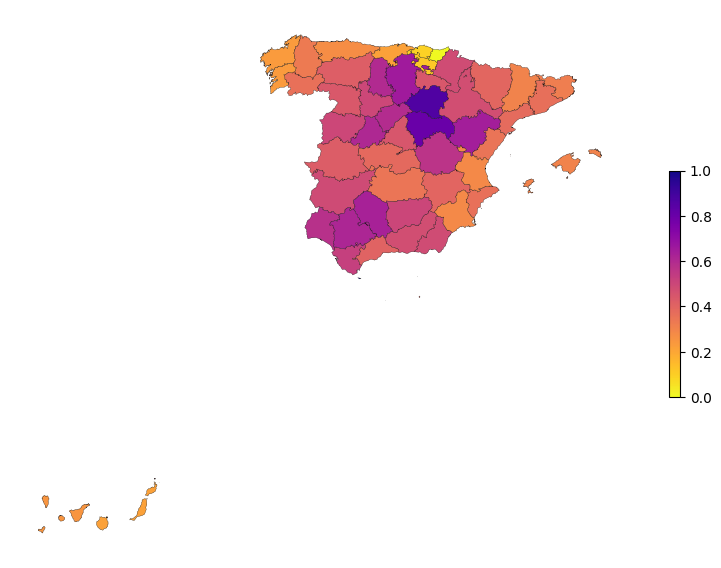

In [21]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df.groupby([location_level]).agg({"value": "mean"}).reset_index()
data_tmp = pd.merge(data_tmp, gdf, on=location_level)

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

In [32]:
asd = pd.concat([data_tmp, data_tmp2])

<AxesSubplot:>

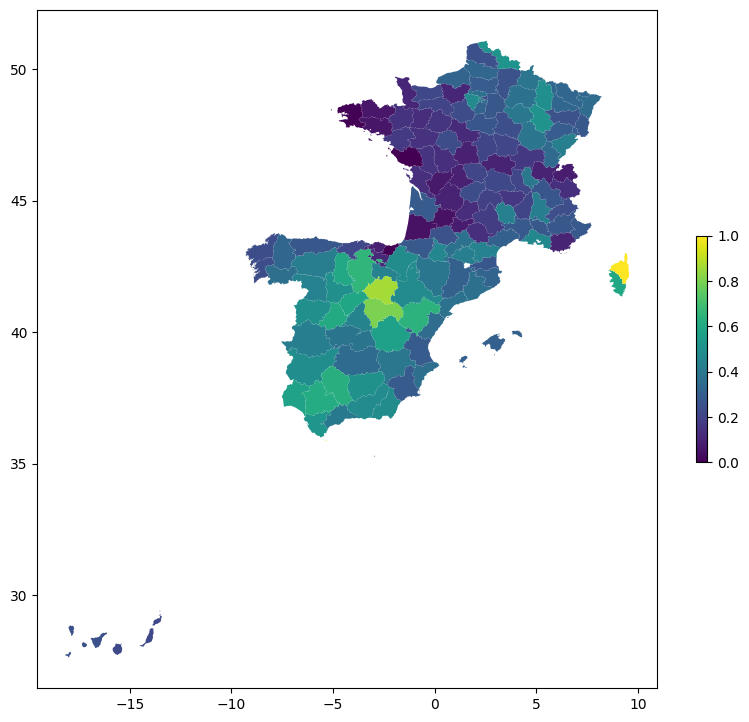

In [35]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

asd.plot(column="value", ax=ax, 
        lw=0.2,
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    ))

In [31]:
gdf2 = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")
df2 = pd.read_csv(f"data_output/France/2022_divisiveness_department.csv.gz", compression="gzip")
df2 = df2.dropna()
gdf2 = gdf2.rename(columns={"nom": "department"})

display(df2)
data_tmp2 = df2.groupby(["department"]).agg({"value": "mean"}).reset_index()
data_tmp2 = pd.merge(data_tmp2, gdf2, on="department")

data_tmp2 = gpd.GeoDataFrame(data_tmp2)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp2["value"] = NormalizeData(data_tmp2["value"])


,department,candidate,value
0,Ain,Emmanuel MACRON,0.053806
1,Ain,Fabien ROUSSEL,0.012031
2,Ain,Jean LASSALLE,0.017987
3,Ain,Jean-Luc MÉLENCHON,0.059014
4,Ain,Marine LE PEN,0.065168
...,...,...,...
958,Yvelines,Marine LE PEN,0.071506
959,Yvelines,Nicolas DUPONT-AIGNAN,0.007639
960,Yvelines,Valérie PÉCRESSE,0.036441
961,Yvelines,Yannick JADOT,0.019890
